<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumBlue">

# Urinary Essential Elements of Young Children with Autism Spectrum Disorder (ASD) and their Mothers

- [Mendeley Reference](https://data.mendeley.com/datasets/79fk29dvk6/1)
- [Science Direct Reference](https://www.sciencedirect.com/science/article/abs/pii/S1750946720300088?via%3Dihub)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumBlue">

### Table of Contents <a class="anchor" id="PAN_toc"></a>

* [Table of Contents](#PAN_toc)
    * [Page 1 - Abstract](#PAN_page_1)
    * [Page 2 - Imported Libraries](#PAN_page_2)
    * [Page 3 - Import the Dataset](#PAN_page_3)
    * [Page 4 - Setting Notebook Options](#PAN_page_4)
    * [Page 5 - Looking at the Data](#PAN_page_5)
    * [Page 6 - Checking the Column Names](#PAN_page_6)
    * [Page 7 - Cleaning the Column Names](#PAN_page_7)
    * [Page 8 - Counting Columns](#PAN_page_8)
    * [Page 9 - Getting Info about the Dataset](#PAN_page_9)
    * [Page 10 - Get Descriptive Statistics about the Dataset](#PAN_page_10)
    * [Page 11 - Counting Rows and Removing any NANs](#PAN_page_11)
    * [Page 12 - Q1: Does the increase of toxic elements or decrease of essential elements predict the status of ASD?](#PAN_page_12)
    * [Page 13 - Q1: Analysis -Multiple Stepwise Regression - Backwards](#PAN_page_13)
    * [Page 14 - Q2: How does the urine test differ (Toxic vs Essential) for kids with Autism (ASD) to Typically Developing kids (TD)?](#PAN_page_14)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumBlue">

# Page 1 - Abstract <a class="anchor" id="PAN_page_1"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumBlue">

### Background
Even though the cause of autism spectrum disorders (ASD) remains unknown, the current understanding points towards complex interactions between environmental and genetic factors. One important environmental factor to consider is intake of toxic and essential elements, and their role in metabolism. Essential elements have received considerably less attention in the literature than the presence of toxins in urine.

### Method
The purpose of this investigation is to comprehensively assess the association between urinary element compositions of 28 mothers who had young children with ASD and 29 mothers who had young typically developing (TD) children, and in a subset of their children (21 with ASD and 26 TD).

### Questions
1. Does the increase of toxic elements or decrease of essential elements (IV's) predict the status of ASD (DV)?
2. How does the urine test differ (Toxic vs Essential) for kids with Autism (ASD) to Typically Developing kids (TD)?
3. How does the urine test differ (Toxic vs Essential) for mothers with Autism (ASD) to Typically Developing moms (TD)?
4. How does the urine test differ (Toxic vs Essential) for kids with Autism (ASD) to their moms with Autism(ASD)?

### Analysis Setup
DV1 = Status with 2 levels (ASD or TD)<br>
DV2 = Type with 2 levels (Child or Mother)<br>
IV1 = Group of 20 Toxic elements (Aluminum to Uranium) <br>
IV2 = Group of 19 Essential elements (Boron to Creatinine)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumBlue">

# Page 2 - Imported Libraries<a class="anchor" id="PAN_page_2"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumBlue">

In [4]:
install.packages("readxl")


The downloaded binary packages are in
	/var/folders/6v/tnqw_0q102z17p9kj6xrr6k80000gn/T//RtmpB7nwBV/downloaded_packages


In [5]:
library("mvnormtest")                   #test for multivariate normality
library("car")                          #run the MANOVA test and other assumption testing
library("IDPmisc")                      #remove missing data for Shapiro test
library("multcomp")                     #conducting post hocs for ANCOVAs
library("dplyr")                        #calculate means
library("readxl")
library("tidyr")
library("ggplot2")

Loading required package: carData

Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser



Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following object is masked from ‘package:car’:

    recode


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumBlue">

# Page 3 - Import the Dataset <a class="anchor" id="PAN_page_3"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumBlue">

In [6]:
#import data from Data folder
data <- read_excel("../Data/DATA.xlsx")

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumBlue">

# Page 4 - Setting Notebook Options<a class="anchor" id="PAN_page_4"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumBlue">

In [7]:
# set max columns and rows
options(repr.matrix.max.cols=1000)
options(max.print = 105) # set the maximum number of rows to 105
options(repr.matrix.max.rows=105)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumBlue">

# Page 5 - Looking at the Data<a class="anchor" id="PAN_page_5"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumBlue">

In [8]:
data

'ID Number' 'Status' 'Type'   'Aluminum'   'Antimony'   'Arsenic'   
1    1          'ASD'    'Child'   7.000000000 2.000000e-01 1.100000e+01
2    3          'ASD'    'Child'  19.000000000 2.000000e-01 8.100000e+00
    'Barium'     'Beryllium'  'Bismuth'    'Cadmium'    'Cesium' 'Gadolinium'
1   2.100000e+00 0.0007071068 1.131371e-04 1.414214e-04  4.3     9.899495e-05
2   8.000000e+00 0.0003535534 5.656854e-05 7.071068e-05 16.0     4.949747e-05
    'Lead'       'Mercury'    'Nickel'     'Palladium'  'Platinum'  
1   2.000000e-01 0.0004242641 4.900000e+00 0.0008485281 1.131371e-04
2   1.000000e+00 0.0002121320 2.900000e+00 0.0004242641 5.656854e-05
    'Tellurium'  'Thallium'   'Thorium'    'Tin'        'Tungsten'  
1   0.0005656854 1.000000e-01 4.242641e-05 1.600000e+00 3.000000e-01
2   0.0002828427 6.000000e-01 2.121320e-05 1.000000e+00 2.000000e-01
    'Uranium'    'Boron' 'Calcium' 'Chromium'   'Cobalt'     'Copper'
1   7.071068e-05  2.30   140.0     0.0004242641 0.0011313708 0.014   
2   3.535534e-05  4.90    81.0     0.0002121320 0.0005656854 0.018   
    'Iron'     'Lithium' 'Magnesium' 'Manganese'  'Molybdenum' 'Phosphorus'
1   0.24000000 0.083     200         0.0007000000 0.130        1180        
2   0.20000000 0.170     170         0.0050000000 0.180         360        
    'Potassium' 'Selenium' 'Sodium' 'Strontium' 'Sulfur' 'Vanadium'   'Zinc'
1    24         0.110       56      0.130        680     0.0002828427 0.660 
2   120         0.094      290      0.170        860     0.0005000000 0.480 
    'Creatinine'
1   175.0       
2    76.0       
 [ reached getOption("max.print") -- omitted 103 rows ]

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumBlue">

# Page 6 - Checking the Column Names<a class="anchor" id="PAN_page_6"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumBlue">

In [9]:
# check the column names - notice the extra ' single quote
names(data)

[1] "'ID Number'"  "'Status'"     "'Type'"       "'Aluminum'"   "'Antimony'"  
 [6] "'Arsenic'"    "'Barium'"     "'Beryllium'"  "'Bismuth'"    "'Cadmium'"   
[11] "'Cesium'"     "'Gadolinium'" "'Lead'"       "'Mercury'"    "'Nickel'"    
[16] "'Palladium'"  "'Platinum'"   "'Tellurium'"  "'Thallium'"   "'Thorium'"   
[21] "'Tin'"        "'Tungsten'"   "'Uranium'"    "'Boron'"      "'Calcium'"   
[26] "'Chromium'"   "'Cobalt'"     "'Copper'"     "'Iron'"       "'Lithium'"   
[31] "'Magnesium'"  "'Manganese'"  "'Molybdenum'" "'Phosphorus'" "'Potassium'" 
[36] "'Selenium'"   "'Sodium'"     "'Strontium'"  "'Sulfur'"     "'Vanadium'"  
[41] "'Zinc'"       "'Creatinine'"

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumBlue">

# Page 7 - Cleaning the Column Names<a class="anchor" id="PAN_page_7"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumBlue">

In [10]:
# Remove the extra quotes from the column names
colnames(data) <- gsub("'", "", colnames(data))

# Change 'ID Number' to 'ID'
names(data)[names(data)=="ID Number"] <- "ID"

# Print the cleaned data frame with the updated column names
names(data)

[1] "ID"         "Status"     "Type"       "Aluminum"   "Antimony"  
 [6] "Arsenic"    "Barium"     "Beryllium"  "Bismuth"    "Cadmium"   
[11] "Cesium"     "Gadolinium" "Lead"       "Mercury"    "Nickel"    
[16] "Palladium"  "Platinum"   "Tellurium"  "Thallium"   "Thorium"   
[21] "Tin"        "Tungsten"   "Uranium"    "Boron"      "Calcium"   
[26] "Chromium"   "Cobalt"     "Copper"     "Iron"       "Lithium"   
[31] "Magnesium"  "Manganese"  "Molybdenum" "Phosphorus" "Potassium" 
[36] "Selenium"   "Sodium"     "Strontium"  "Sulfur"     "Vanadium"  
[41] "Zinc"       "Creatinine"

<hr style="height:5px;border-width:0;color:MediumBlue;background-color:MediumBlue">

# Page 8 - Counting Columns <a class="anchor" id="PAN_page_8"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumBlue;background-color:MediumBlue">


In [11]:
# Count the number of columns
num_cols = ncol(data)

print(num_cols)

[1] 42


<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumBlue">

# Page 9 - Get Info about the Dataset<a class="anchor" id="PAN_page_9"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumBlue">


In [12]:
str(data)

tibble [105 × 42] (S3: tbl_df/tbl/data.frame)
 $ ID        : num [1:105] 1 3 5 6 8 10 12 17 19 20 ...
 $ Status    : chr [1:105] "'ASD'" "'ASD'" "'ASD'" "'ASD'" ...
 $ Type      : chr [1:105] "'Child'" "'Child'" "'Child'" "'Child'" ...
 $ Aluminum  : num [1:105] 7 19 9.2 8.4 5.6 17 9.5 6.8 24 21 ...
 $ Antimony  : num [1:105] 2.00e-01 2.00e-01 5.66e-05 5.66e-05 2.83e-05 ...
 $ Arsenic   : num [1:105] 11 8.1 5.9 14 11 15 120 35 14 12 ...
 $ Barium    : num [1:105] 2.1 8 4.7 3 3.8 3.1 4.2 4 2.6 1.8 ...
 $ Beryllium : num [1:105] 0.000707 0.000354 0.000354 0.000354 0.000177 ...
 $ Bismuth   : num [1:105] 1.13e-04 5.66e-05 2.00e-01 5.66e-05 2.83e-05 ...
 $ Cadmium   : num [1:105] 1.41e-04 7.07e-05 7.07e-05 7.07e-05 3.54e-05 ...
 $ Cesium    : num [1:105] 4.3 16 11 16 4.5 10 5.7 3.3 4.4 3.6 ...
 $ Gadolinium: num [1:105] 9.90e-05 4.95e-05 4.95e-05 4.95e-05 2.47e-05 ...
 $ Lead      : num [1:105] 0.2 1 0.5 0.9 0.4 0.5 0.3 0.4 0.5 0.1 ...
 $ Mercury   : num [1:105] 0.000424 0.000212 0.000212 

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumBlue">

# Page 10 - Get Descriptive Statistics about the Dataset<a class="anchor" id="PAN_page_10"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumBlue">

# Descriptive statistics:
Basic descriptive statistics such as mean, median, mode, standard deviation, variance, range, and percentiles can be computed for each element to summarize its distribution.

In [17]:
# test ChatGPT code
stats <- summary(data[, !(names(data) %in% c("ID", "Status", "Type"))])

In [18]:
stats

    Aluminum           Antimony            Arsenic              Barium         
 Min.   : 0.00141   Min.   :0.0000283   Min.   :  0.00106   Min.   : 0.000071  
 1st Qu.: 2.50000   1st Qu.:0.0000566   1st Qu.:  5.00000   1st Qu.: 1.100000  
   Beryllium            Bismuth             Cadmium              Cesium      
 Min.   :0.0001768   Min.   : 0.000028   Min.   :0.0000354   Min.   : 1.200  
 1st Qu.:0.0003536   1st Qu.: 0.000057   1st Qu.:0.0000707   1st Qu.: 3.000  
   Gadolinium            Lead              Mercury              Nickel        
 Min.   : 0.00002   Min.   :0.0000707   Min.   :0.0001061   Min.   :3.54e-04  
 1st Qu.: 0.00005   1st Qu.:0.2000000   1st Qu.:0.0002121   1st Qu.:2.10e+00  
   Palladium            Platinum           Tellurium        
 Min.   :0.0002121   Min.   :2.828e-05   Min.   :0.0001414  
 1st Qu.:0.0004243   1st Qu.:5.657e-05   1st Qu.:0.0002828  
    Thallium            Thorium               Tin              Tungsten        
 Min.   :0.0000354   Min. 

In [13]:
#Distribution of Status Variable
table(data$Status)


'ASD'  'TD' 
   50    55 

In [14]:
#Distribution of Type Variable
table(data$Type)


 'Child' 'Mother' 
      47       58 

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumBlue">

# Page 11 - Counting Rows and Removing any NANs<a class="anchor" id="PAN_page_11"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumBlue">

In [15]:
#Count the number of rows using nrow()
print(nrow(data))

[1] 105


In [16]:
#Drop rows with missing values if there are any
data = na.omit(data)

In [17]:
#Recount the number of rows to assess any losses after dropping missing data
print(nrow(data))

[1] 105


<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumBlue">

# Page 12 - Q1: Does the increase of toxic elements or decrease of essential elements predict the status of ASD? <a class="anchor" id="PAN_page_12"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumBlue">

# Subgroup Analysis:
The data shows urine test result levels of toxic and non-toxic essential elements for children with ASD or TD type, as well as their ASD or TD type mothers. 
Before analyzing which elements have the greatest influence on the prediction of ASD in either kids or their moms, we must first start by evaluating correlations between high and low levels of toxic and non-toxic essential elements and their corresponding status (ASD/TD).  
An aditional correlation between children type and mother type should be evaluated to see if generational factors might also be present in the data.

# Subgroups:

-child  
-childToxic (containing children ASD + TD only toxic elements)  
-childEssential (containing children ASD + TD only non-toxic essential elements)  

-mother  
-motherToxic (containing Mother ASD + TD only toxic elements)  
-motherEssential (containing Mother ASD + TD only non-toxic essential elements)  

# Set up Child subgroup data (Question 1)

In [18]:
# Create subset: child
child <- (data[0:47 , 1:42])
child

ID Status Type    Aluminum Antimony     Arsenic     Barium Beryllium   
1   1 'ASD'  'Child'  7.0     2.000000e-01 1.10000e+01  2.1   0.0007071068
2   3 'ASD'  'Child' 19.0     2.000000e-01 8.10000e+00  8.0   0.0003535534
   Bismuth      Cadmium      Cesium Gadolinium   Lead Mercury      Nickel
1  1.131371e-04 1.414214e-04  4.3   9.899495e-05 0.2  0.0004242641  4.9  
2  5.656854e-05 7.071068e-05 16.0   4.949747e-05 1.0  0.0002121320  2.9  
   Palladium    Platinum     Tellurium    Thallium     Thorium      Tin
1  0.0008485281 1.131371e-04 0.0005656854 1.000000e-01 4.242641e-05 1.6
2  0.0004242641 5.656854e-05 0.0002828427 6.000000e-01 2.121320e-05 1.0
   Tungsten     Uranium      Boron Calcium Chromium     Cobalt       Copper
1  3.000000e-01 7.071068e-05  2.3  140     0.0004242641 0.0011313708 0.014 
2  2.000000e-01 3.535534e-05  4.9   81     0.0002121320 0.0005656854 0.018 
   Iron       Lithium Magnesium Manganese Molybdenum Phosphorus Potassium
1  0.24000000 0.083   200       0.0007    0.130      1180        24      
2  0.20000000 0.170   170       0.0050    0.180       360       120      
   Selenium Sodium Strontium Sulfur Vanadium     Zinc  Creatinine
1  0.110     56    0.130      680   0.0002828427 0.660 175.0     
2  0.094    290    0.170      860   0.0005000000 0.480  76.0     
 [ reached getOption("max.print") -- omitted 45 rows ]

In [19]:
unique(child$Status)

[1] "'ASD'" "'TD'"

In [20]:
#Recoding IV - Status into numeric
child$Status[child$Status == '\'ASD\''] <- 0
child$Status[child$Status == '\'TD\''] <- 1

# Set up childToxic subgroup data

In [21]:
#Create subset: child with Toxic elements only
childToxic <- (child[0:47 , 1:23])
#Subset to drop 'ID'
childToxic1 <- childToxic[, -1]
#Subset to drop 'Type'
childToxic2 <- childToxic1[,-2]
childToxic2

Status Aluminum Antimony     Arsenic     Barium Beryllium    Bismuth     
1  0       7.0     2.000000e-01 1.10000e+01  2.1   0.0007071068 1.131371e-04
2  0      19.0     2.000000e-01 8.10000e+00  8.0   0.0003535534 5.656854e-05
3  0       9.2     5.656854e-05 5.90000e+00  4.7   0.0003535534 2.000000e-01
4  0       8.4     5.656854e-05 1.40000e+01  3.0   0.0003535534 5.656854e-05
5  0       5.6     2.828427e-05 1.10000e+01  3.8   0.0001767767 2.828427e-05
   Cadmium      Cesium Gadolinium   Lead Mercury      Nickel Palladium   
1  1.414214e-04  4.3   9.899495e-05 0.2  0.0004242641  4.9   0.0008485281
2  7.071068e-05 16.0   4.949747e-05 1.0  0.0002121320  2.9   0.0004242641
3  7.071068e-05 11.0   4.949747e-05 0.5  0.0002121320  9.4   0.0004242641
4  7.071068e-05 16.0   4.949747e-05 0.9  0.0002121320 15.0   0.0004242641
5  3.535534e-05  4.5   2.474874e-05 0.4  1.0000000000  2.5   0.0002121320
   Platinum     Tellurium    Thallium     Thorium      Tin Tungsten    
1  1.131371e-04 0.0005656854 1.000000e-01 4.242641e-05 1.6 3.000000e-01
2  5.656854e-05 0.0002828427 6.000000e-01 2.121320e-05 1.0 2.000000e-01
3  5.656854e-05 0.0002828427 3.000000e-01 2.121320e-05 8.4 6.000000e-01
4  5.656854e-05 0.0002828427 4.000000e-01 2.121320e-05 1.4 3.000000e-01
5  2.828427e-05 0.0001414214 4.000000e-01 1.060660e-05 0.6 3.000000e-01
   Uranium     
1  7.071068e-05
2  3.535534e-05
3  3.535534e-05
4  3.535534e-05
5  1.767767e-05
 [ reached getOption("max.print") -- omitted 42 rows ]

# Set up childEssential subgroup data

In [38]:
#Create subset: child with Essential elements only
childEssential <- child%>% select(Status, Boron, Calcium, Chromium, Cobalt, Copper, Iron, Lithium, Magnesium, Manganese, Molybdenum, Phosphorus, Potassium, Selenium, Sodium, Strontium, Sulfur, Vanadium, Zinc, Creatinine)
childEssential

Status Boron Calcium Chromium     Cobalt       Copper Iron       Lithium
1  0       2.3  140     0.0004242641 0.0011313708 0.014  0.24000000 0.083  
2  0       4.9   81     0.0002121320 0.0005656854 0.018  0.20000000 0.170  
3  0       2.9  300     0.0006000000 0.0030000000 0.021  0.60000000 0.170  
4  0       8.6  200     0.0010000000 0.0005656854 0.024  0.43000000 0.061  
5  0       1.3   62     0.0010000000 0.0002828427 0.022  0.03535534 0.220  
   Magnesium Manganese Molybdenum Phosphorus Potassium Selenium Sodium
1  200       0.0007    0.130      1180        24       0.110     56   
2  170       0.0050    0.180       360       120       0.094    290   
3  310       0.0040    0.170      1860       120       0.110    240   
4  390       0.0050    0.043       150       120       0.069    190   
5  170       0.0070    0.085       910       180       0.140    190   
   Strontium Sulfur Vanadium     Zinc  Creatinine
1  0.130      680   0.0002828427 0.660 175.0     
2  0.170      860   0.0005000000 0.480  76.0     
3  0.370     1050   0.0006000000 0.750  58.6     
4  0.330      630   0.0004000000 0.240  54.3     
5  0.120     1290   0.0008000000 0.270  30.6     
 [ reached getOption("max.print") -- omitted 42 rows ]

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumBlue">

# Page 13 - Q1 Analysis: Multiple Stepwise Regression - Backwards <a class="anchor" id="PAN_page_13"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumBlue">

# Multiple Stepwise Regression Backwards - childToxic
Evaluate which toxic elements have the most influence over predicting the Status of Child type?

In [23]:
#Get a Baseline with a FitAll function to create a linear model of all 20 predictor variables
FitAll <- lm(Status ~ ., data=childToxic2)
summary(FitAll)


Call:
lm(formula = Status ~ ., data = childToxic2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0183 -0.3818  0.1014  0.3476  0.6040 

Coefficients: (4 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  7.593e-01  5.147e-01   1.475    0.151
Aluminum     2.072e-04  9.089e-03   0.023    0.982
Antimony     2.910e-01  6.145e-01   0.474    0.639
Arsenic     -7.830e-04  5.194e-03  -0.151    0.881
Barium      -1.126e-02  3.811e-02  -0.295    0.770
Beryllium   -4.670e+02  9.298e+02  -0.502    0.619
Bismuth      3.083e-01  8.216e-01   0.375    0.710
Cadmium     -6.393e-01  1.457e+00  -0.439    0.664
Cesium      -3.372e-02  3.583e-02  -0.941    0.354
Gadolinium  -3.231e-02  2.017e-02  -1.602    0.120
Lead         4.991e-02  2.794e-01   0.179    0.859
Mercury     -6.269e-01  4.640e-01  -1.351    0.187
Nickel       5.442e-03  3.506e-02   0.155    0.878
Palladium           NA         NA      NA       NA
Platinum            NA         NA

In [24]:
#Backwards Elimination
step(FitAll, direction ='backward')

Start:  AIC=-50.15
Status ~ Aluminum + Antimony + Arsenic + Barium + Beryllium + 
    Bismuth + Cadmium + Cesium + Gadolinium + Lead + Mercury + 
    Nickel + Palladium + Platinum + Tellurium + Thallium + Thorium + 
    Tin + Tungsten + Uranium


Step:  AIC=-50.15
Status ~ Aluminum + Antimony + Arsenic + Barium + Beryllium + 
    Bismuth + Cadmium + Cesium + Gadolinium + Lead + Mercury + 
    Nickel + Palladium + Platinum + Tellurium + Thallium + Tin + 
    Tungsten + Uranium


Step:  AIC=-50.15
Status ~ Aluminum + Antimony + Arsenic + Barium + Beryllium + 
    Bismuth + Cadmium + Cesium + Gadolinium + Lead + Mercury + 
    Nickel + Palladium + Platinum + Thallium + Tin + Tungsten + 
    Uranium


Step:  AIC=-50.15
Status ~ Aluminum + Antimony + Arsenic + Barium + Beryllium + 
    Bismuth + Cadmium + Cesium + Gadolinium + Lead + Mercury + 
    Nickel + Palladium + Thallium + Tin + Tungsten + Uranium


Step:  AIC=-50.15
Status ~ Aluminum + Antimony + Arsenic + Barium + Beryllium + 
    


Call:
lm(formula = Status ~ Gadolinium + Mercury + Tin + Tungsten, 
    data = childToxic2)

Coefficients:
(Intercept)   Gadolinium      Mercury          Tin     Tungsten  
    0.33968     -0.03105     -0.60004      0.06061      0.36894  


In [25]:
fitsome = lm(Status~Gadolinium+Mercury+Tin+Tungsten, data = childToxic1)
summary(fitsome)


Call:
lm(formula = Status ~ Gadolinium + Mercury + Tin + Tungsten, 
    data = childToxic1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0701 -0.4285  0.0754  0.3800  0.5745 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.33968    0.11855   2.865  0.00648 **
Gadolinium  -0.03105    0.01478  -2.100  0.04174 * 
Mercury     -0.60004    0.34582  -1.735  0.09005 . 
Tin          0.06061    0.03026   2.003  0.05166 . 
Tungsten     0.36894    0.19997   1.845  0.07210 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4496 on 42 degrees of freedom
Multiple R-squared:  0.2692,	Adjusted R-squared:  0.1996 
F-statistic: 3.867 on 4 and 42 DF,  p-value: 0.009189


### Initial Conclusion: Toxic Elements Model (Gadolinium, Mercury, Tin, Tungsten) accounts for 20% of the variance and resulted in a significant p-value

# Multiple Stepwise Regression Backwards - childEssential
Evaluate which essential elements have the most influence over predicting the Status of Child type?

In [39]:
#Get a Baseline with a FitAll function to create a linear model of essential variables
FitAll <- lm(Status ~ ., data=childEssential)
summary(FitAll)


Call:
lm(formula = Status ~ ., data = childEssential)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72550 -0.22601  0.01145  0.18261  0.67297 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -1.292e-01  6.318e-01  -0.204  0.83957   
Boron        6.810e-02  5.996e-02   1.136  0.26608   
Calcium     -1.392e-03  3.224e-03  -0.432  0.66931   
Chromium     2.655e+02  4.300e+02   0.618  0.54204   
Cobalt      -4.949e+00  1.379e+02  -0.036  0.97163   
Copper       6.188e+00  1.191e+01   0.520  0.60756   
Iron         2.848e-01  1.604e+00   0.177  0.86044   
Lithium     -1.040e+00  1.530e+00  -0.680  0.50247   
Magnesium   -2.219e-03  1.321e-03  -1.679  0.10464   
Manganese   -3.281e+01  8.552e+01  -0.384  0.70426   
Molybdenum   1.043e+00  1.620e+00   0.644  0.52497   
Phosphorus   1.228e-04  2.135e-04   0.575  0.56993   
Potassium   -2.798e-03  3.946e-03  -0.709  0.48441   
Selenium    -5.457e+00  3.612e+00  -1.511  0.14246   
Sodium       9.4

In [40]:
#Backwards Elimination
step(FitAll, direction ='backward')

Start:  AIC=-62.12
Status ~ Boron + Calcium + Chromium + Cobalt + Copper + Iron + 
    Lithium + Magnesium + Manganese + Molybdenum + Phosphorus + 
    Potassium + Selenium + Sodium + Strontium + Sulfur + Vanadium + 
    Zinc + Creatinine

             Df Sum of Sq    RSS     AIC
- Cobalt      1   0.00026 5.3515 -64.121
- Strontium   1   0.00071 5.3519 -64.117
- Iron        1   0.00624 5.3574 -64.068
- Creatinine  1   0.01157 5.3628 -64.021
- Manganese   1   0.02917 5.3804 -63.867
- Calcium     1   0.03696 5.3882 -63.799
- Vanadium    1   0.03721 5.3884 -63.797
- Copper      1   0.05352 5.4047 -63.655
- Phosphorus  1   0.06557 5.4168 -63.550
- Chromium    1   0.07559 5.4268 -63.464
- Molybdenum  1   0.08221 5.4334 -63.406
- Lithium     1   0.09157 5.4428 -63.325
- Potassium   1   0.09962 5.4508 -63.256
- Sodium      1   0.13988 5.4911 -62.910
- Zinc        1   0.14956 5.5008 -62.827
<none>                    5.3512 -62.123
- Boron       1   0.25561 5.6068 -61.930
- Selenium    1   0.45


Call:
lm(formula = Status ~ Boron + Calcium + Magnesium + Potassium + 
    Sulfur + Zinc, data = childEssential)

Coefficients:
(Intercept)        Boron      Calcium    Magnesium    Potassium       Sulfur  
 -0.1654179    0.0587242   -0.0009518   -0.0013730   -0.0032665    0.0008914  
       Zinc  
  0.3132017  


In [41]:
fitsome = lm(Status~Boron+Calcium+Magnesium+Potassium+Sulfur+Zinc, data = childEssential)
summary(fitsome)


Call:
lm(formula = Status ~ Boron + Calcium + Magnesium + Potassium + 
    Sulfur + Zinc, data = childEssential)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.92821 -0.28862 -0.02236  0.25437  0.66300 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.1654179  0.2581805  -0.641   0.5254    
Boron        0.0587242  0.0339608   1.729   0.0915 .  
Calcium     -0.0009518  0.0005827  -1.633   0.1102    
Magnesium   -0.0013730  0.0009061  -1.515   0.1376    
Potassium   -0.0032665  0.0015787  -2.069   0.0450 *  
Sulfur       0.0008914  0.0001767   5.045 1.03e-05 ***
Zinc         0.3132017  0.2260168   1.386   0.1735    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3986 on 40 degrees of freedom
Multiple R-squared:  0.4529,	Adjusted R-squared:  0.3708 
F-statistic: 5.518 on 6 and 40 DF,  p-value: 0.0003069


### Initial Conclusion: Essential Elements Model (Boron, Calcium, Magnesium, Potassium, Sulfur, Zinc) accounts for 37% of the variance and resulted in a significant p-value

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumBlue">

# Page 14 - Q2 How does the urine test differ (Toxic vs Essential) for kids with Autism (ASD) to Typically Developing kids (TD)?  <a class="anchor" id="PAN_page_14"></a>

[Back to Top](#PAN_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumBlue">

# Review Means for Subgroups

## Mean childToxic elements identified by the model

In [45]:
childToxic1 %>%
   group_by(Status) %>% 
   summarise_at(vars("Gadolinium", "Mercury", "Tin", "Tungsten"), mean)

Status Gadolinium   Mercury      Tin      Tungsten 
1 0      1.5714768904 0.1240014528 1.533333 0.2571429
2 1      0.0000523531 0.0002243704 3.003846 0.4115398

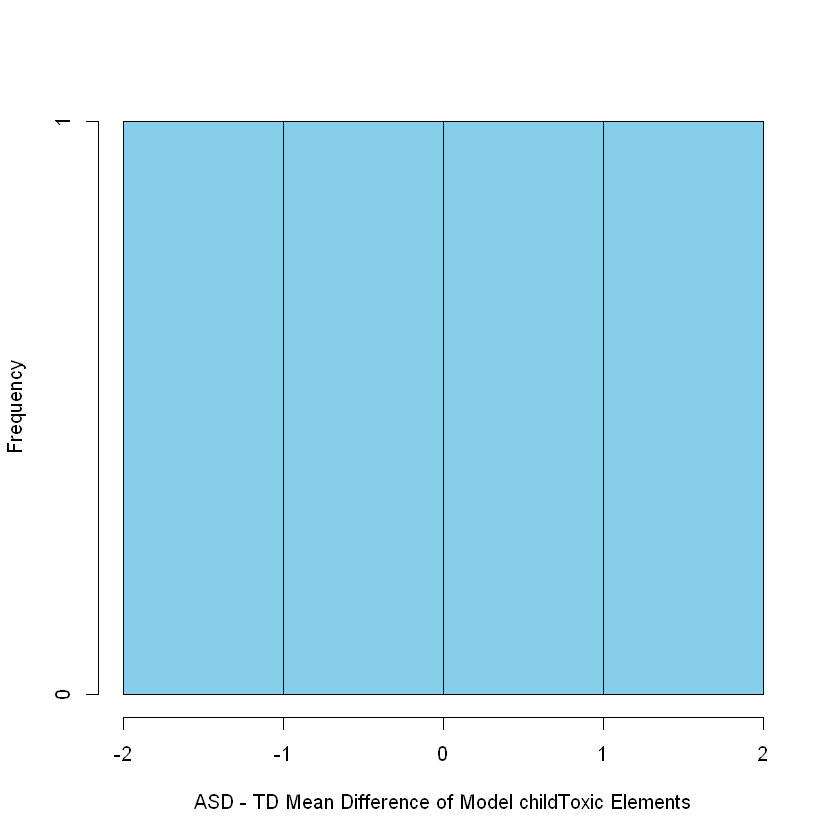

In [51]:
# Make arrays of the mean childEssential model-defined elements
meanToxic_asd_0 <- c(1.57, 0.12, 1.5, 0.26)
meanToxic_td_1 <- c(0.00005, 0.0002, 3.00, 0.41)

# Combine those arrays into a data frame
meanToxic_df <- data.frame(meanToxic_asd_0, meanToxic_td_1)

# Calculate the differences between each pair and insert a new column
meanToxic_df$difference <-(meanToxic_df$meanToxic_asd_0 - meanToxic_df$meanToxic_td_1)

# Inspect the differences to see if they appear to be normally-distributed
hist(meanToxic_df$difference, right = FALSE, col = "skyblue", main ="", xlab = "ASD - TD Mean Difference of Model childToxic Elements")

## Difference Means for childToxic elements identified by the model

In [64]:
# calculate the difference between the means of the two DV levels
diff_meansToxic <- meanToxic_df$meanToxic_asd_0 - meanToxic_df$meanToxic_td_1

# add the difference as a new column to the existing dataframe
meanToxic_df <- meanToxic_df %>%
  mutate(diff_meansToxic = diff_meansToxic)
diff_meansToxic

[1]  1.56995  0.11980 -1.50000 -0.15000

## Mean childToxic elements outside the model - Differential Comparison

In [47]:
childToxic1 %>%
   group_by(Status) %>% 
   summarise_at(vars("Aluminum", "Antimony", "Arsenic", "Barium", "Beryllium", "Bismuth", "Cadmium", "Cesium", "Lead", "Nickel", "Palladium", "Tellurium", "Thallium", "Thorium",  ), mean)

Status Aluminum Antimony  Arsenic  Barium   Beryllium    Bismuth   
1 0      14.66190 0.1124092 17.10973 4.380952 0.0003788072 0.01434094
2 1      16.60385 0.1296415 16.40773 4.069231 0.0003739507 0.04620715
  Cadmium    Cesium   Lead      Nickel   Palladium    Tellurium    Thallium 
1 0.02863372 7.957143 0.6047619 5.438095 0.0004545686 0.0003030458 0.2985714
2 0.01930012 7.423077 0.6307692 5.542308 0.0004487408 0.0002991606 0.2380783
  Thorium     
1 2.272843e-05
2 2.243704e-05

## Mean childEssential elements identified by the model

In [59]:
childEssential %>%
   group_by(Status) %>% 
   summarise_at(vars("Boron", "Calcium", "Magnesium", "Potassium", "Sulfur", "Zinc"), mean)

Status Boron    Calcium  Magnesium Potassium Sulfur    Zinc     
1 0      3.642857 157.0952 202.3333  77.61905   848.5714 0.5701429
2 1      3.442308 174.1923 225.5000  66.73077  1322.6923 0.7442308

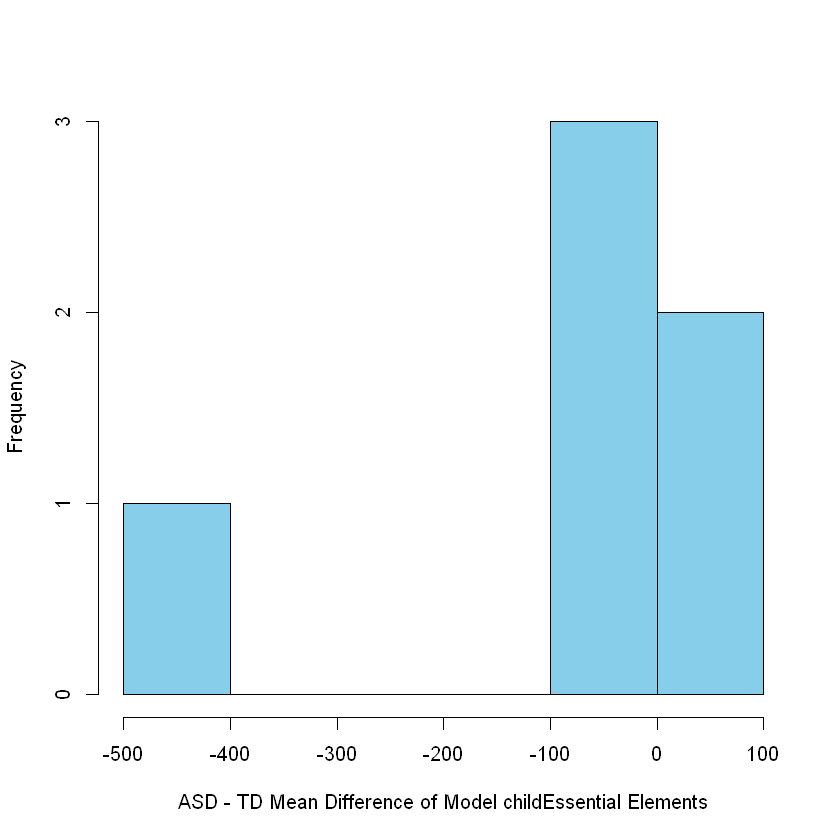

In [52]:
# Make arrays of the mean childEssential model-defined elements
meanEssentials_asd_0 <- c(3.64, 157.10, 202.33, 77.62, 848.57, 0.57)
meanEssentials_td_1 <- c(3.44, 174.19, 225.50, 66.73, 1322.69, 0.74)

# Combine those arrays into a data frame
meanEssentials_df <- data.frame(meanEssentials_asd_0, meanEssentials_td_1)

# Calculate the differences between each pair and insert a new column
meanEssentials_df$difference <-(meanEssentials_df$meanEssentials_asd_0 - meanEssentials_df$meanEssentials_td_1)

# Inspect the differences to see if they appear to be normally-distributed
hist(meanEssentials_df$difference, right = FALSE, col = "skyblue", main ="", xlab = "ASD - TD Mean Difference of Model childEssential Elements")

## Difference Means for childEssential elements identified by the model

In [65]:
# calculate the difference between the means of the two DV levels
diff_meansEssential <- meanEssentials_df$meanEssentials_asd_0 - meanEssentials_df$meanEssentials_td_1

# add the difference as a new column to the existing dataframe
meanEssentials_df <- meanEssentials_df %>%
  mutate(diff_meansEssential = diff_meansEssential)
diff_meansEssential

[1]    0.20  -17.09  -23.17   10.89 -474.12   -0.17

## Mean childEssential elements outside the model - Differential Comparison


In [44]:
childEssential %>%
   group_by(Status) %>% 
   summarise_at(vars("Chromium", "Cobalt", "Copper","Iron", "Lithium", "Manganese", "Molybdenum", "Phosphorus", "Selenium", "Sodium", "Strontium", "Vanadium", "Creatinine"), mean)

Status Chromium     Cobalt       Copper     Iron      Lithium   Manganese  
1 0      0.0004408436 0.0008524971 0.02085714 0.3075332 0.1080476 0.003447619
2 1      0.0003648116 0.0009282234 0.02207692 0.3214692 0.1334231 0.002546154
  Molybdenum Phosphorus Selenium   Sodium   Strontium Vanadium     Creatinine
1 0.0847619   913.8095  0.09604762 192.1429 0.2264762 0.0004527194 90.07143  
2 0.1273846  1373.8462  0.13053846 208.5385 0.2390385 0.0004473604 79.42692

## Hypothesis: The means of Toxic elements will be higher while the means of the Essential elements will the lower in kids with Austim Spectrum Disorder (ASD), compared to Typically Developing (TD) kids

## Conculsions: 

1. The mean difference for childToxic elements were significantly lower compared to the mean difference of childEssential elements. 

2. We hypothesized we'd find a higher levels of toxic elements in the kids with Autism Spectrum Disorder (ASD) than the Typically Developing (TD) kids. Analyzing the means between subgroups revealed a 50/50 split. The means of the ASD kids were higher for Gadolinium and Mercury while the means of the TD kids were higher for Tin and Tungsten by nearly double. 

3. The mean difference for childEssential elements were significantly lower for Calcium, Magneisum, Sulfur and Zinc and higher for Boron and Potassium for ASD kids compared to TD kids.

## Breaking Down the Toxic Elements
GADOLINIUM 

Additional Analysis Options: Review the rates of MRI's between ASD and TD kids.

MERCURY

TIN

TUNGSTEN


## Breaking Down the Essential Elements
BORON: Boron is most often found in through ingesting fruits, vegetables, water, insecticides, or from exposure to Boron-based laundry detegents.  readily absorbed through gastrointestinal system and respiratory tract. Kids with ASD have higher rates of gastrointestinal and respiratory (allergies/asthma) dysfunction which could inhibit absoprtion resulting in higher means. While the mean differential initial challenged our hypothesis, the higher Boron means do align with known biologically inflammatory and digestive system dysregulations.

CALCIUM: Calcium is most often found in dairy foods and beverages, leafy greens and fish like salmon. Due to picky eating and food sensory/color sensitivies often experienced in ASD kids, the mean differential is aligned with our hypothesis. 

MAGNESIUM: Magnesium 

POTASSIUM:

SULFUR:

ZINC: